In [63]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

import warnings # For ignoring warning messages
warnings.filterwarnings('ignore')

sns.set()  # Set seaborn as default visualization style
plt.style.use('ggplot')  # Set the 'ggplot' style for matplotlib
%matplotlib inline

In [64]:
# read dataset and store in a dataframe
df = pd.read_csv('indian_liver_patient.csv')

In [65]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [66]:
# check the shape of the dataset
df.shape

(583, 11)

In [67]:
# column names of dataset
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [68]:
# numerical description of the dataset
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [70]:
# checking duplicate values
df.duplicated().sum()

13

In [71]:
# drop the duplicated values
df = df.drop_duplicates()

## Checking Outliers

In [72]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<Axes: ylabel='Alamine_Aminotransferase'>

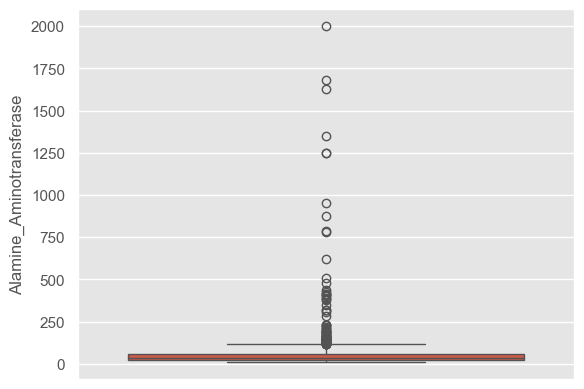

In [73]:
sns.boxplot(df['Alamine_Aminotransferase'])

<Axes: ylabel='Aspartate_Aminotransferase'>

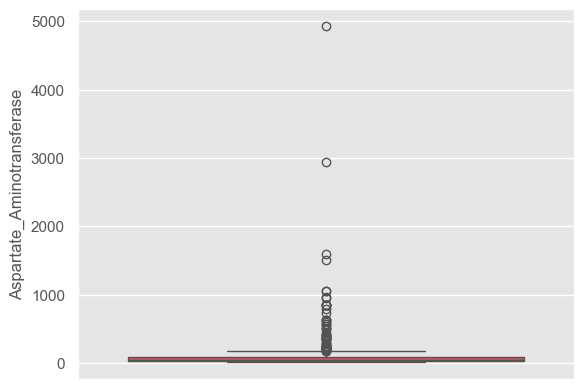

In [74]:
sns.boxplot(df['Aspartate_Aminotransferase'])

In [75]:
# checking the outlier value
df['Aspartate_Aminotransferase'].sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [76]:
# removing the outlier value
df = df[df['Aspartate_Aminotransferase'] <= 2500]

In [77]:
# checking for null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [78]:
# removing null values
df = df.dropna(how='any')

In [79]:
df.shape

(564, 11)

# EDA on Liver disease dataset

### Distribution of Numerical Features

<function matplotlib.pyplot.show(close=None, block=None)>

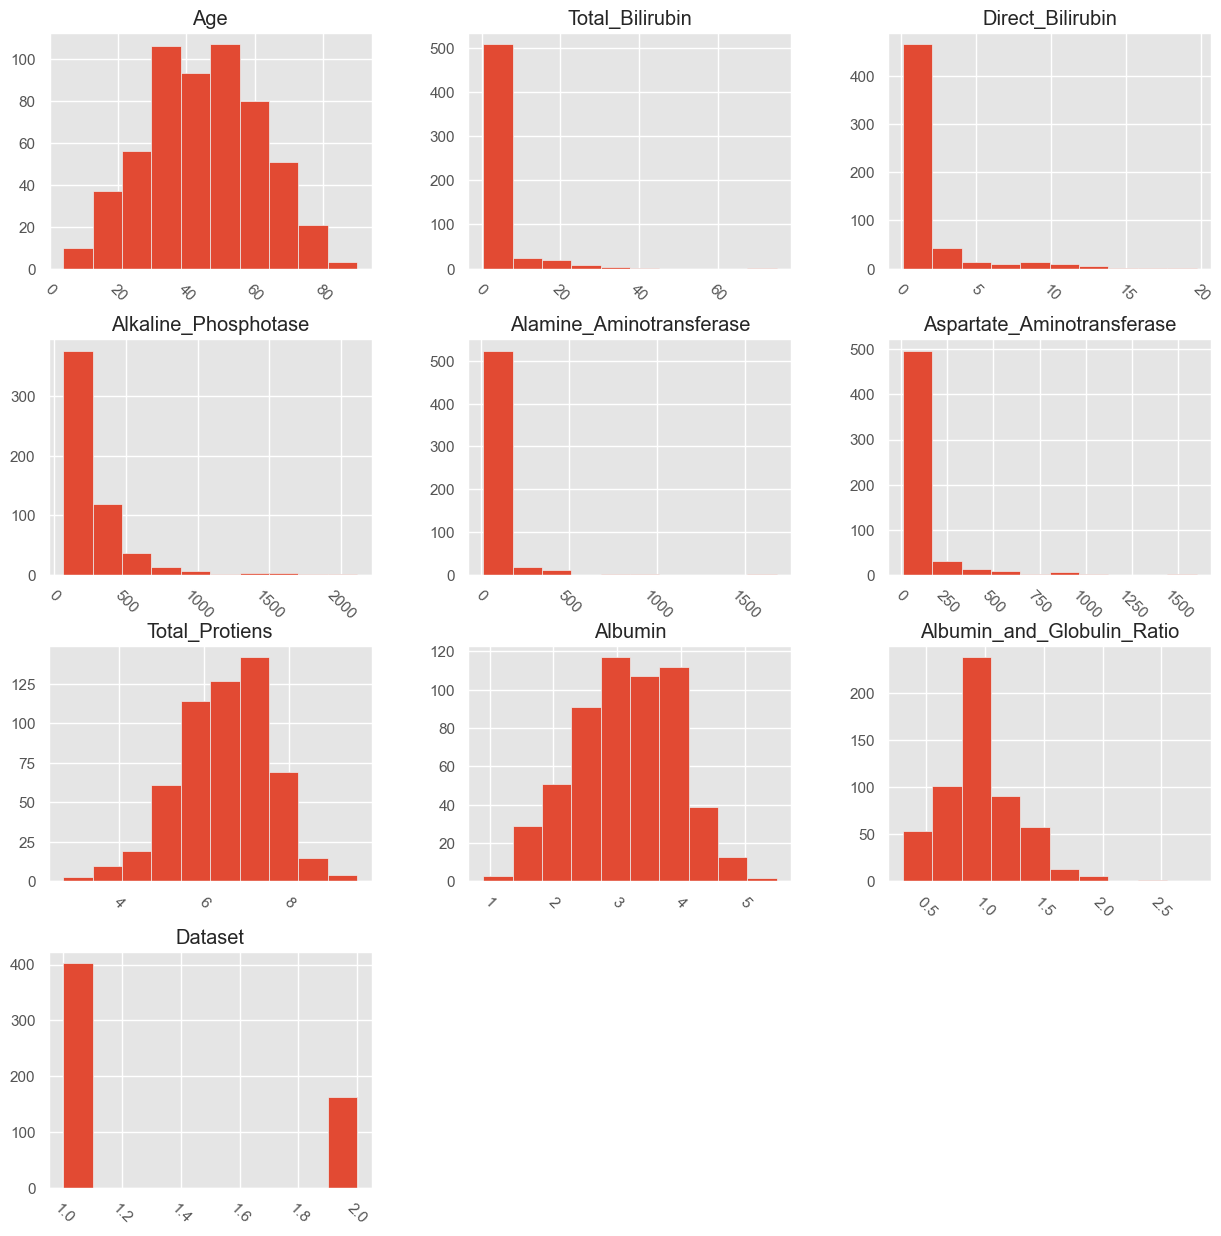

In [80]:
# plotting histograms
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show

In [81]:
# converting the dataset column values into 0 and 1
def convertDataset(x):
    if x == 2:
        return 0
    else:
        return 1
df['Dataset'] = df['Dataset'].map(convertDataset)

### Distribution on Categorical column

In [82]:
df.describe(include=['object'])

,Gender
count,564
unique,2
top,Male
freq,426


<Axes: xlabel='Gender', ylabel='count'>

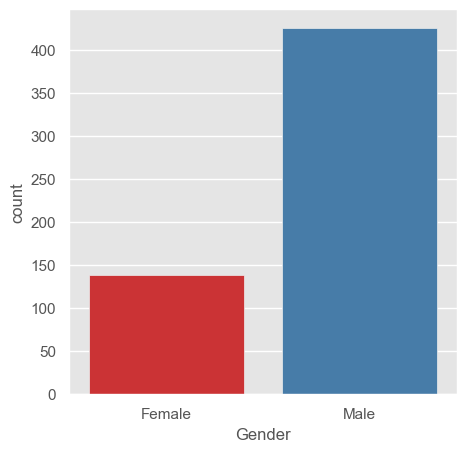

In [83]:
# plotting bar plots
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Gender', palette='Set1')

- the number of male patients are greater than the females.

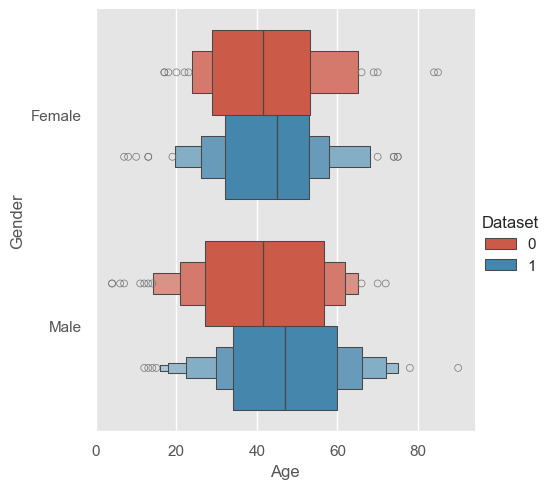

In [84]:
# plotting categorical plot for age and gender for the datset column
sns.catplot(x='Age', y='Gender', hue='Dataset',data=df,kind='boxen')

### Categorical Value Handling

In [85]:
# converting gender into 0 & 1
def convertGender(x):
    if x == 'Male':
        return 0
    else:
        return 1
df['Gender'] = df['Gender'].map(convertGender)

## Checking Correlation

In [86]:
# checking correlation
cor = round(df.corr(),3)
cor

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000,-0.057,0.010,0.005,0.073,-0.099,-0.071,-0.199,-0.268,-0.212,0.134
Gender,-0.057,1.000,-0.087,-0.098,0.028,-0.078,-0.092,0.092,0.093,0.005,-0.076
Total_Bilirubin,0.010,-0.087,1.000,0.873,0.202,0.205,0.298,-0.008,-0.223,-0.209,0.222
Direct_Bilirubin,0.005,-0.098,0.873,1.000,0.230,0.223,0.319,0.000,-0.230,-0.203,0.249
Alkaline_Phosphotase,0.073,0.028,0.202,0.230,1.000,0.113,0.130,-0.032,-0.162,-0.230,0.185
Alamine_Aminotransferase,-0.099,-0.078,0.205,0.223,0.113,1.000,0.836,-0.031,-0.023,-0.013,0.167
Aspartate_Aminotransferase,-0.071,-0.092,0.298,0.319,0.130,0.836,1.000,-0.039,-0.103,-0.086,0.206
Total_Protiens,-0.199,0.092,-0.008,0.000,-0.032,-0.031,-0.039,1.000,0.786,0.238,-0.036
Albumin,-0.268,0.093,-0.223,-0.230,-0.162,-0.023,-0.103,0.786,1.000,0.687,-0.165
Albumin_and_Globulin_Ratio,-0.212,0.005,-0.209,-0.203,-0.230,-0.013,-0.086,0.238,0.687,1.000,-0.172


<Axes: >

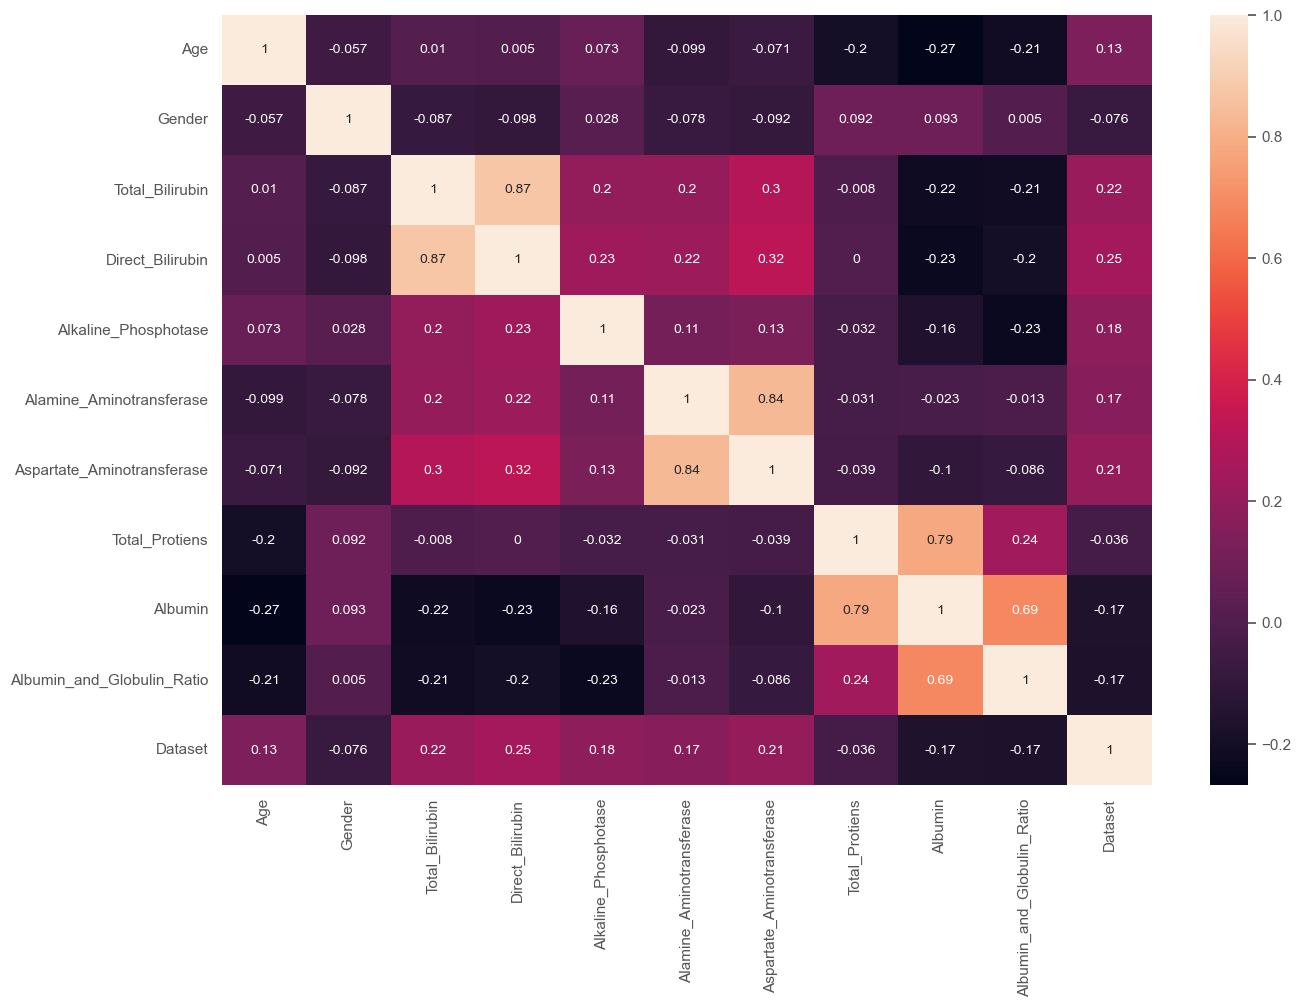

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(data=cor, annot=True)

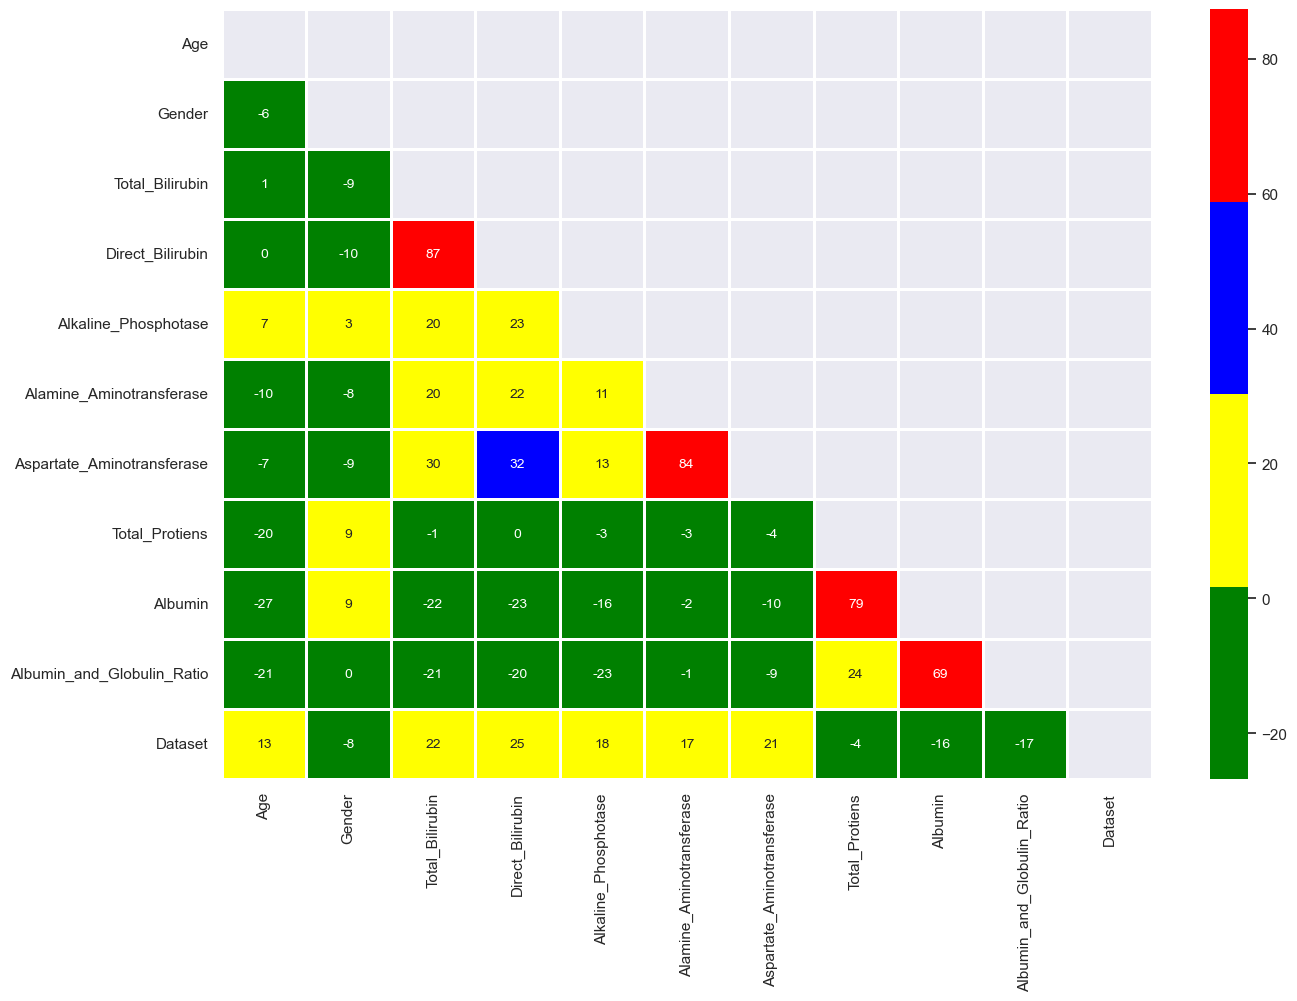

In [88]:
# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

# Set the size of the heatmap figure
plt.figure(figsize=(15,10))

# Use a dark style for the heatmap axes
with sns.axes_style('dark'):
    # Plot the heatmap with annotations, formatting, and specific colors
    ax = sns.heatmap(data=cor*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green','yellow','blue','red']))


# Building Machine Learning Model

#### Data Preparation

In [89]:
# Separate the target variable 'Dataset' from the rest of the dataframe
y = df.Dataset  

# Remove the 'Dataset' column from the dataframe and store the remaining columns in 'X'
X = df.drop('Dataset', axis=1)  


In [127]:
# importing ml libraires and models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

#### Data Standardization

In [94]:
train_mean = X_train.mean()
train_std = X_train.std()

In [95]:
X_train = (X_train - train_mean) / train_std

In [96]:
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.083144e-16,7.877414e-17,-1.969353e-17,-2.363224e-17,-1.270233e-16,2.757095e-17,-2.363224e-17,-1.398241e-16,1.851192e-16,-7.483543e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.568370e+00,-5.468521e-01,-4.545818e-01,-4.862972e-01,-9.633546e-01,-4.150881e-01,-4.880241e-01,-3.301461e+00,-2.789562e+00,-2.079954e+00
25%,-7.747074e-01,-5.468521e-01,-3.928717e-01,-4.516441e-01,-4.787490e-01,-3.330804e-01,-4.080816e-01,-6.720731e-01,-7.673117e-01,-7.705468e-01
50%,2.934809e-02,-5.468521e-01,-3.620167e-01,-4.169909e-01,-3.259454e-01,-2.573809e-01,-3.167187e-01,5.327531e-02,-8.967850e-03,-1.763780e-02
75%,8.952540e-01,-5.468521e-01,-1.151762e-01,-7.045893e-02,5.169765e-02,-9.967374e-02,-7.974627e-02,6.879552e-01,8.125713e-01,5.388602e-01
max,2.441515e+00,1.824593e+00,1.105435e+01,6.305729e+00,7.973471e+00,1.011975e+01,8.585452e+00,2.773332e+00,2.392454e+00,5.121785e+00


In [97]:
X_test = (X_test - train_mean) / train_std

In [98]:
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,-0.201633,0.166680,-0.029574,-0.022619,0.166349,-0.035753,-0.004175,0.245043,0.249406,0.208901
std,1.019796,1.092491,0.833443,0.911646,1.288436,0.912202,0.926675,0.912073,1.013153,1.199502
min,-2.382818,-0.546852,-0.423727,-0.486297,-0.627187,-0.408780,-0.493734,-3.392130,-2.789562,-1.752602
25%,-0.836558,-0.546852,-0.392872,-0.451644,-0.443822,-0.326772,-0.402371,-0.218730,-0.388140,-0.737812
50%,-0.094353,-0.546852,-0.362017,-0.382338,-0.339043,-0.257381,-0.316719,0.325281,0.370204,0.211508
75%,0.462301,1.824593,-0.084321,-0.105112,0.136831,-0.087057,-0.025500,0.778624,1.002157,0.866212
max,2.750767,1.824593,3.757133,3.914658,6.401777,7.407188,5.444853,2.864000,3.024408,6.103840


## Training the models

### Logistic Regression

In [99]:
# logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [100]:
y_pred = lr.predict(X_test)

In [101]:
train_lr_acc = accuracy_score(y_train, lr.predict(X_train))
print('Training Accuracy Score : ', train_lr_acc)
test_lr_acc = accuracy_score(y_test, lr.predict(X_test))
print('Testing Acuuracy Score : ', test_lr_acc)

Training Accuracy Score :  0.7117516629711752
Testing Acuuracy Score :  0.7699115044247787


In [103]:
print("Confusion Matrix : \n",confusion_matrix(y_test, lr.predict(X_test)))

Confusion Matrix : 
 [[11 21]
 [ 5 76]]


In [104]:
print('Classification Report : \n',classification_report(y_test, lr.predict(X_test)))

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.78      0.94      0.85        81

    accuracy                           0.77       113
   macro avg       0.74      0.64      0.66       113
weighted avg       0.76      0.77      0.74       113



### K-Neighbors Classifier

In [106]:
# K-neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [107]:
knn.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1])

In [108]:
train_knn_acc = accuracy_score(y_train, knn.predict(X_train))
print('Training Accuracy Score : ', train_knn_acc)
test_knn_acc = accuracy_score(y_test, knn.predict(X_test))
print('Testing Acuuracy Score : ', test_knn_acc)

Training Accuracy Score :  0.811529933481153
Testing Acuuracy Score :  0.6637168141592921


In [109]:
print("Confusion Matrix : \n",confusion_matrix(y_test, knn.predict(X_test)))

Confusion Matrix : 
 [[16 16]
 [22 59]]


In [110]:
print('Classification Report : \n',classification_report(y_test, knn.predict(X_test)))

Classification Report : 
               precision    recall  f1-score   support

           0       0.42      0.50      0.46        32
           1       0.79      0.73      0.76        81

    accuracy                           0.66       113
   macro avg       0.60      0.61      0.61       113
weighted avg       0.68      0.66      0.67       113



### Hyperparameter Tuning using Support Vector Machine

In [111]:
# using SVC
svc = SVC(probability=True)
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.1, 1, 10, 15, 20, 30]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [112]:
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [113]:
grid_search.best_score_

0.7117460317460318

In [114]:
svc = SVC(C=0.01, gamma=0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [115]:
train_svc_acc = accuracy_score(y_train, svc.predict(X_train))
print('Training Accuracy Score : ', train_svc_acc)
test_svc_acc = accuracy_score(y_test, svc.predict(X_test))
print('Testing Acuuracy Score : ', test_svc_acc)

print("Confusion Matrix : \n",confusion_matrix(y_test, svc.predict(X_test)))
print('Classification Report : \n',classification_report(y_test, svc.predict(X_test)))

Training Accuracy Score :  0.7117516629711752
Testing Acuuracy Score :  0.7168141592920354
Confusion Matrix : 
 [[ 0 32]
 [ 0 81]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



### Hyperparameter Tuning using Decision Tree

In [116]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
train_dtc_acc = accuracy_score(y_train, dtc.predict(X_train))
print('Training Accuracy Score : ', train_dtc_acc)
test_dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print('Testing Acuuracy Score : ', test_dtc_acc)

print("Confusion Matrix : \n",confusion_matrix(y_test, dtc.predict(X_test)))
print('Classification Report : \n',classification_report(y_test, dtc.predict(X_test)))

Training Accuracy Score :  1.0
Testing Acuuracy Score :  0.6283185840707964
Confusion Matrix : 
 [[16 16]
 [26 55]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.38      0.50      0.43        32
           1       0.77      0.68      0.72        81

    accuracy                           0.63       113
   macro avg       0.58      0.59      0.58       113
weighted avg       0.66      0.63      0.64       113



In [118]:
grid_parameters = {
    'criterion': ['gini','entropy'],
    'max_depth': [3,5,7,10,12,15],
    'splitter': ['best','random'],
    'min_samples_leaf': [1,2,3,5,7],
    'min_samples_split': [1,2,3,5,7],
    'max_features': ['auto','sqrt','log2']
}

grid_search_dt = GridSearchCV(dtc, grid_parameters, verbose=1, cv=24, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

Fitting 24 folds for each of 1800 candidates, totalling 43200 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [119]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'splitter': 'random'}

In [120]:
grid_search_dt.best_score_

0.7275828460038986

In [121]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=5,min_samples_split=7,splitter='random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=7,
                       splitter='random')

In [122]:
train_dtc_acc = accuracy_score(y_train, dtc.predict(X_train))
print('Training Accuracy Score : ', train_dtc_acc)
test_dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print('Testing Acuuracy Score : ', test_dtc_acc)

print("Confusion Matrix : \n",confusion_matrix(y_test, dtc.predict(X_test)))
print('Classification Report : \n',classification_report(y_test, dtc.predict(X_test)))

Training Accuracy Score :  0.7427937915742794
Testing Acuuracy Score :  0.7079646017699115
Confusion Matrix : 
 [[12 20]
 [13 68]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.48      0.38      0.42        32
           1       0.77      0.84      0.80        81

    accuracy                           0.71       113
   macro avg       0.63      0.61      0.61       113
weighted avg       0.69      0.71      0.70       113



### Random Forest Classification

In [124]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=130,criterion='entropy',max_depth=15,max_features=0.75,min_samples_leaf=5,min_samples_split=7)

In [125]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=5, min_samples_split=7,
                       n_estimators=130)

In [126]:
train_rf_acc = accuracy_score(y_train, rf_clf.predict(X_train))
print('Training Accuracy Score : ', train_rf_acc)
test_rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))
print('Testing Acuuracy Score : ', test_rf_acc)

print("Confusion Matrix : \n",confusion_matrix(y_test, rf_clf.predict(X_test)))
print('Classification Report : \n',classification_report(y_test, rf_clf.predict(X_test)))

Training Accuracy Score :  0.9312638580931264
Testing Acuuracy Score :  0.6902654867256637
Confusion Matrix : 
 [[12 20]
 [15 66]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.44      0.38      0.41        32
           1       0.77      0.81      0.79        81

    accuracy                           0.69       113
   macro avg       0.61      0.59      0.60       113
weighted avg       0.68      0.69      0.68       113



### Gradient Boosting Classifier

In [135]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.001,0.1,1,10],
    'n_estimators': [100,150,180,200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=20, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train,y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [136]:
grid_search_gbc.best_params_

{'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 100}

In [137]:
grid_search_gbc.best_score_

0.7120553359683793

In [138]:
gbc = GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=0.001)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, loss='exponential')

In [139]:
train_gbc_acc = accuracy_score(y_train, gbc.predict(X_train))
print('Training Accuracy Score : ', train_gbc_acc)
test_gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print('Testing Acuuracy Score : ', test_gbc_acc)

print("Confusion Matrix : \n",confusion_matrix(y_test, gbc.predict(X_test)))
print('Classification Report : \n',classification_report(y_test, gbc.predict(X_test)))

Training Accuracy Score :  0.7117516629711752
Testing Acuuracy Score :  0.7168141592920354
Confusion Matrix : 
 [[ 0 32]
 [ 0 81]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



### XGBoost Classifier

In [140]:
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.001, max_depth=100, n_estimators=300)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [141]:
train_xgb_acc = accuracy_score(y_train, xgb.predict(X_train))
print('Training Accuracy Score : ', train_xgb_acc)
test_xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print('Testing Acuuracy Score : ', test_xgb_acc)

print("Confusion Matrix : \n",confusion_matrix(y_test, xgb.predict(X_test)))
print('Classification Report : \n',classification_report(y_test, xgb.predict(X_test)))

Training Accuracy Score :  0.9379157427937915
Testing Acuuracy Score :  0.6991150442477876
Confusion Matrix : 
 [[15 17]
 [17 64]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.47      0.47      0.47        32
           1       0.79      0.79      0.79        81

    accuracy                           0.70       113
   macro avg       0.63      0.63      0.63       113
weighted avg       0.70      0.70      0.70       113



# Model Comparison

In [142]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','SVC','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classfier','XGBoost'],
    'Score': [round(test_lr_acc,4)*100,round(test_knn_acc,4)*100,round(test_svc_acc,4)*100,round(test_dtc_acc,4)*100,round(test_rf_acc,4)*100,round(test_gbc_acc,4)*100,round(test_xgb_acc,4)*100]
})

In [143]:
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Logistic Regression,76.99
2,SVC,71.68
5,Gradient Boosting Classfier,71.68
3,Decision Tree Classifier,70.80
6,XGBoost,69.91
4,Random Forest Classifier,69.03
1,KNN,66.37


## Saving the best model

In [144]:
import pickle
model = test_lr_acc
pickle.dump(model,open('liver.pkl', 'wb'))

## Model Comparision Plots

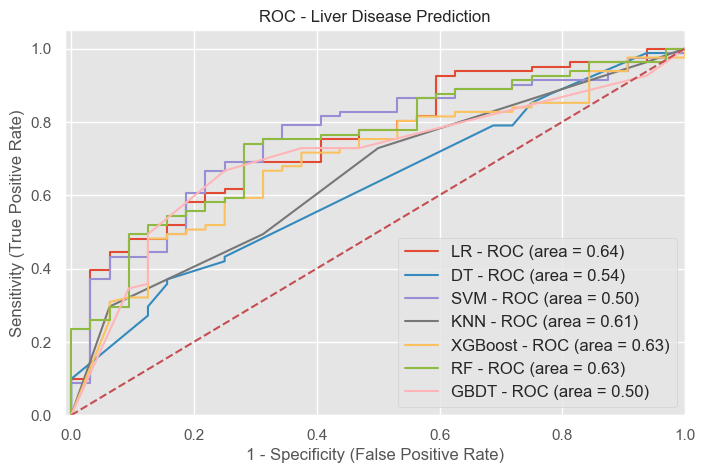

In [146]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rf_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[76.99000000000001, 70.8, 71.67999999999999, 66.36999999999999, 69.91000000000001, 69.03, 71.67999999999999]
[64.1, 52.910000000000004, 50.0, 61.419999999999995, 62.94, 59.489999999999995, 50.0]


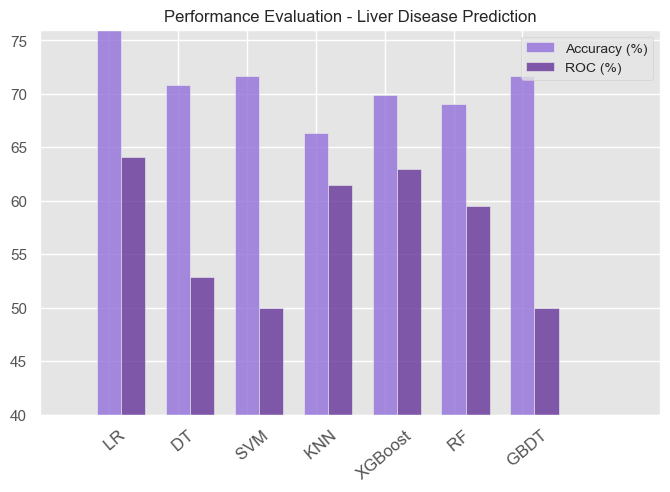

In [147]:
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rf_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(test_lr_acc,4), 100*round(test_dtc_acc,4), 100*round(test_svc_acc,4), 100*round(test_knn_acc,4), 100*round(test_xgb_acc,4), 
                  100*round(test_rf_acc,4), 100*round(test_gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()